In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder =  str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines')
# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


This Journal supports the documentation of the baseline input files for the PV_ICE calculator by graphing all baseline inputs of modules and materials for all years. Currently, this includes:
- USA module installs
- Global module intalls
- glass
- silicon
- silver (preliminary)

In [3]:
import PV_ICE

In [48]:
filelist = sorted(os.listdir(baselinesfolder))
matcher = "modules"
module_baselines = [s for s in filelist if matcher in s]
matcher = "material"
material_baselines = [s for s in filelist if matcher in s]  

# Plot only 1st module baseline example

In [49]:
material_baselines[i]

'baseline_material_copper.csv'

In [50]:
i=0
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='standard', file=os.path.join(baselinesfolder, module_baselines[i]))


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [51]:
r1.scenario['standard'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
0,1995,12.500000,12.50,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
1,1996,9.667667,12.70,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
2,1997,11.622000,12.88,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
3,1998,11.781000,13.06,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
4,1999,16.884667,13.24,17.0,22.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0


In [52]:
keys = list(r1.scenario['standard'].metdata[0].keys())
list(keys)

['year',
 'new_Installed_Capacity_[MW]',
 'mod_eff',
 'mod_reliability_t50',
 'mod_reliability_t90',
 'mod_degradation',
 'mod_lifetime',
 'mod_MFG_eff',
 'mod_EOL_collection_eff',
 'mod_EOL_collected_recycled',
 'mod_Repowering',
 'mod_Repairing']

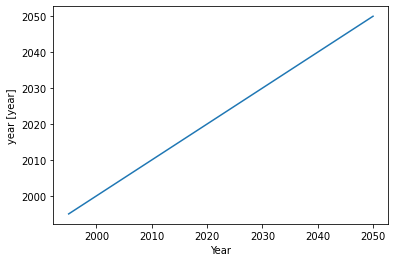

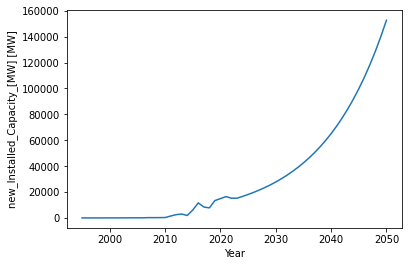

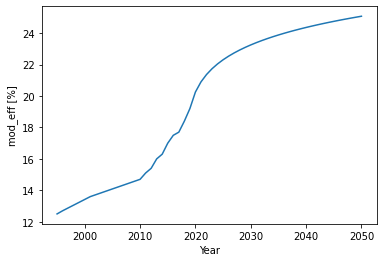

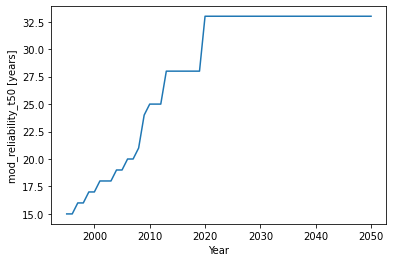

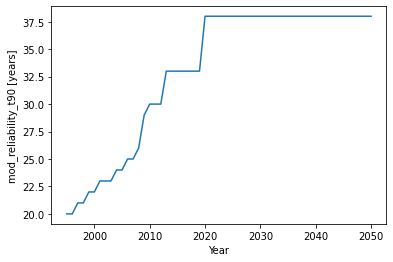

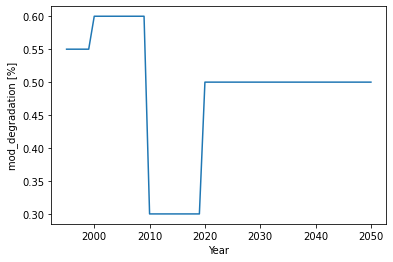

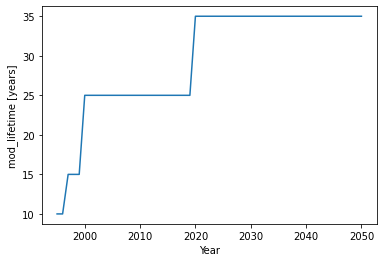

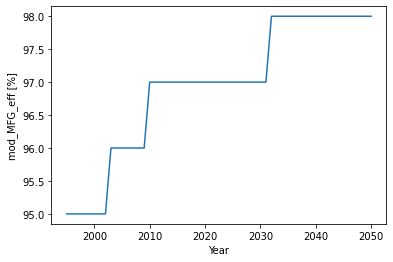

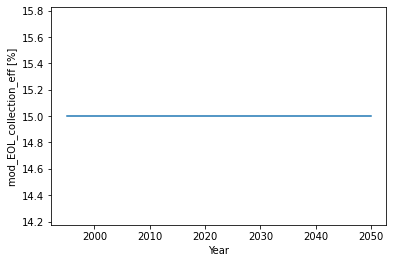

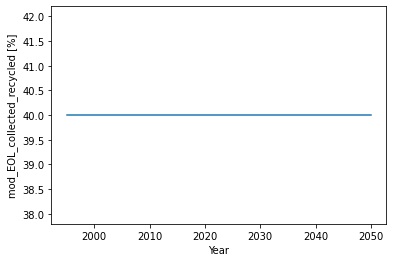

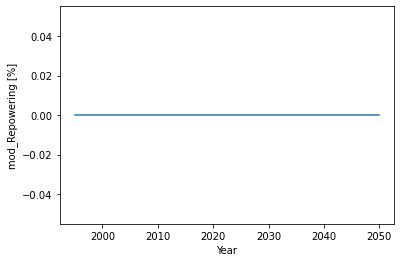

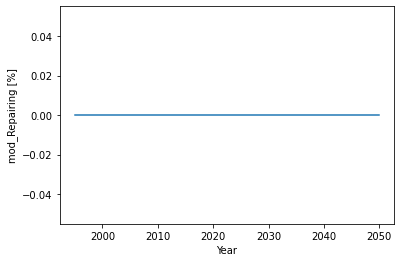

In [53]:
for k in keys:
    plt.figure()
    plt.plot(r1.scenario['standard'].data.year, r1.scenario['standard'].data[k])
    plt.xlabel('Year')
    plt.ylabel(k+' ['+r1.scenario['standard'].metdata[0][k]+']')

In [54]:
r1.scenario['standard'].data.year[0]

1995

In [61]:
r1.calculateMassFlow()


Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations


In [74]:
weibulls = r1.scenario['standard'].data.WeibullParams
weibulls = pd.DataFrame(weibulls.tolist())

In [55]:
avgt= (r1.scenario['standard'].data['mod_reliability_t50']+r1.scenario['standard'].data['mod_reliability_t90'])/2.0
avgtmax = r1.scenario['standard'].data['mod_reliability_t90']+5
avgtmin = r1.scenario['standard'].data['mod_reliability_t50']-5


In [77]:
df = r1.scenario['standard'].data

#for generation, row in df.iterrows(): 
    #generation is an int 0,1,2,.... etc.
generation=0
row=df.iloc[generation]

t50, t90 = row['t50'], row['t90']   #  t50 = 17.0; t90 = 22.0
weibullInputParams = weibull_params({t50: 0.50, t90: 0.90})      #  alpha = 4.65, beta = 18.39
f = weibull_cdf(**weibull_params({t50: 0.50, t90: 0.90}))
x = np.clip(df.index - generation, 0, np.inf)
cdf = list(map(f, x))


generation=40
row=df.iloc[generation]
t50, t90 = row['t50'], row['t90']   #  t50 = 17.0; t90 = 22.0
weibullInputParams2 = weibull_params({t50: 0.50, t90: 0.90})      #  alpha = 4.65, beta = 18.39
g = weibull_cdf(**weibull_params({t50: 0.50, t90: 0.90}))
generation = 0
x = np.clip(df.index - generation, 0, np.inf)
gdf = list(map(g, x))


#weibullInputParams = {'alpha': 3.4,
#                      'beta': 4.5}

#g = weibull_cdf(weibullInputParams['alpha'], weibullInputParams['beta'])
#x = np.clip(df.index - generation, 0, np.inf)
#gdf = list(map(g, x))

h = weibull_cdf_alphaonly(2.4928, 30)
x = np.clip(df.index - generation, 0, np.inf)
hdf = list(map(h, x))

j = weibull_cdf_alphaonly(5.3759, 30)
x = np.clip(df.index - generation, 0, np.inf)
jdf = list(map(j, x))

i = weibull_cdf_alphaonly(14.41, 30)
x = np.clip(df.index - generation, 0, np.inf)
idf = list(map(i, x))



plt.plot(cdf, label=r'$ \alpha $ : '+str(round(weibullInputParams['alpha'],2))+ r' $ \beta $ : '+ str(round(weibullInputParams['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(gdf, label=r'$ \alpha $ : '+str(round(weibullInputParams2['alpha'],2))+ r' $ \beta $ : '+ str(round(weibullInputParams2['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(hdf, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(jdf, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
plt.plot(idf, label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#   pdf = [0] + [j - i for i, j in zip(cdf[: -1], cdf[1 :])]

# In[3]:

KeyError: 't50'

(1995.0, 2050.0)

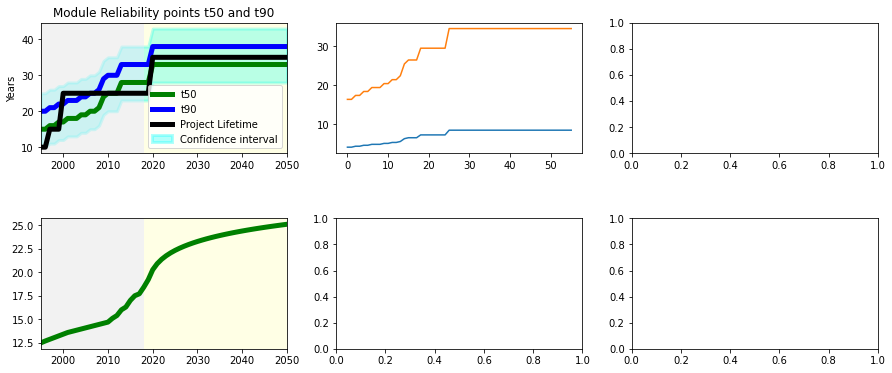

In [78]:

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
i = 0

axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
#axs[i].plot([],[],color='g', label='aluminum', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_reliability_t50'],color='g', label='t50', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_reliability_t90'],color='b', label='t90', linewidth=5)
axs[i].set_xlim([1995, 2050])
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_lifetime'],color='k', label='Project Lifetime', linewidth=5)


#axs[i].fill_between(r1.scenario['standard'].data.year, r1.scenario['standard'].data['mod_reliability_t50'], r1.scenario['standard'].data['mod_reliability_t90'], 
#                   alpha= 0.3, color='cyan', lw=3)# , alpha=.6)

axs[i].fill_between(r1.scenario['standard'].data.year, avgtmin, avgtmax, 
                   alpha= 0.3, color='cyan', lw=3, label='Confidence interval')# , alpha=.6)
axs[i].set_ylabel('Years')
axs[i].set_title('Module Reliability points t50 and t90')
axs[i].legend()

# ALPHA AND BETA
i = 1
axs[i].plot(weibulls['alpha'])
axs[i].plot(weibulls['beta'])


# EFFICIENCY
i=3
axs[i].axvspan(1995, 2018, facecolor='0.9', alpha=0.5)
axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
#axs[i].plot([],[],color='g', label='aluminum', linewidth=5)
axs[i].plot(r1.scenario['standard'].data.year,r1.scenario['standard'].data['mod_eff'],color='g', label='t50', linewidth=5)
axs[i].set_xlim([1995, 2050])



# Module Files 

## USA

In [8]:
print(baseline_modules_US)

    year new_Installed_Capacity_[MW]      mod_eff mod_reliability_t50  \
0   year                          MW            %               years   
1   1995                        12.5         12.5                  15   
2   1996                 9.667666667         12.7                  15   
3   1997                      11.622        12.88                  16   
4   1998                      11.781        13.06                  16   
5   1999                 16.88466667        13.24                  17   
6   2000                 20.92666667        13.42                  17   
7   2001                      27.985         13.6                  18   
8   2002                      42.476  13.72222222                  18   
9   2003                      59.745  13.84444444                  18   
10  2004                      94.752  13.96666667                  19   
11  2005                    88.66446  14.08888889                  19   
12  2006                     82.0722  14.21111111  

TypeError: unhashable type: 'numpy.ndarray'

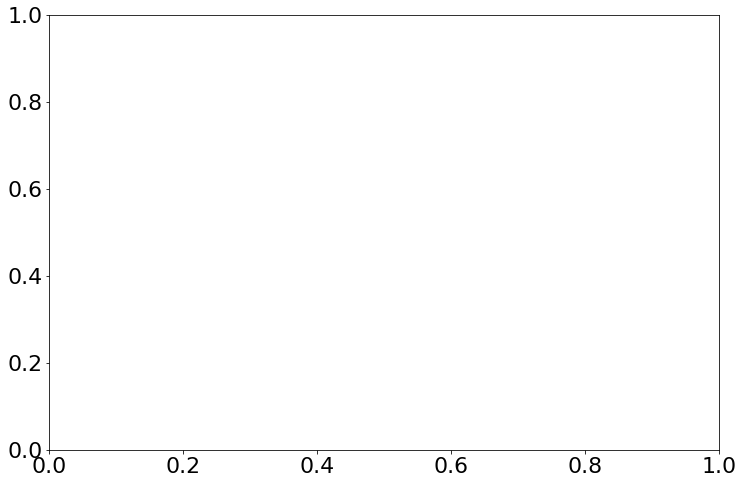

In [7]:
plt.plot(baseline_modules_US)